In [1]:
import pandas as pd

pd.read_csv('fct_invoice.csv')

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [2]:
pd.read_json('dim_customer.json')

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [3]:
csv_df = pd.read_csv('fct_invoice.csv')
json_df = pd.read_json('dim_customer.json')

In [4]:
csv_df['Count'] = 1
csv_df['#'] = csv_df.index+1

In [5]:
cols = list(csv_df.columns)
csv_df = csv_df[[cols[-1]]+cols[0:9]]

csv_df

,#,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Count
0,1,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,2,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,3,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,4,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,5,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...
99452,99453,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,99454,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,99455,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,99456,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


# Easy

In [6]:
# 1. How many unique customers are there in the dataset?
csv_df1 = csv_df['customer_id'].nunique()
csv_df1

5191

In [7]:
# 2. What are the different categories of products available?
# How many unique categories are there?
csv_df2a = csv_df['category'].unique()

print("Categories: " + str(csv_df2a))

print()

csv_df2b = csv_df['category'].nunique()
print("Number of Categories: " + str(csv_df2b))

Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']

Number of Categories: 8


In [8]:
# 3a. What are the different payment methods used by customers?
csv_df3a = csv_df['payment_method'].unique()
print("Different payment methods:")
print(csv_df3a)

print("")
# 3b. Which payment method is the most popular?
csv_df3b = csv_df['payment_method'].value_counts().idxmax()
mp = csv_df.loc[csv_df["payment_method"] == csv_df3b].sum()["Count"]
print("Most popular payment method:")
print(csv_df3b+" - "+str(mp))


Different payment methods:
['Credit Card' 'Debit Card' 'Cash']

Most popular payment method:
Cash - 44447


# Medium

In [9]:
csv_df['sales'] = csv_df['quantity'] * csv_df['price']

In [10]:
#1. What are the three most popular categories, by total sales?
category_sales = csv_df.groupby(['category']).sum()['sales']
csv_df4a = category_sales.sort_values(ascending=False) 
csv_df4 = csv_df4a.head(3)

csv_df4

C:\Users\user\AppData\Local\Temp\ipykernel_21496\2016306377.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sales = csv_df.groupby(['category']).sum()['sales']


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [11]:
# 2. What are the total sales attributed to customers over the age of 45?
json_df1 = json_df.copy()

json_df1.rename(columns = {'id':'customer_id'}, inplace = True)

new_df = pd.merge(csv_df, json_df1)

over_45 = new_df.loc[new_df['age'] > 45]

csv_df5 = over_45.groupby(['Count']).sum()['sales']

#Better answer is over_45.sum()['sales']

csv_df5

C:\Users\user\AppData\Local\Temp\ipykernel_21496\1219472023.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  csv_df5 = over_45.groupby(['Count']).sum()['sales']


Count
1    82039768.15
Name: sales, dtype: float64

In [25]:
new_df

,#,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,Count,sales,age,first_name,gender,last_name
0,1,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1,7502.00,NaN,William,M,Anderson
1,2199,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,1,162.64,NaN,William,M,Anderson
2,3816,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,1,5401.53,NaN,William,M,Anderson
3,5211,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,1,2700.72,NaN,William,M,Anderson
4,5621,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,1,15004.25,NaN,William,M,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,99187,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,1,600.17,NaN,Melissa,F,Bell
99453,99286,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,1,378.75,36.0,Leslie,F,Bass
99454,99291,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,1,7502.00,NaN,Kelly,F,Roberts
99455,99313,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1,1200.32,47.0,Shawn,M,Perez


In [26]:
from matplotlib import pyplot as plt

In [27]:
# 3. How is the data distributed across different invoice dates? 
# Are there any seasonal trends or patterns? (Use a graph for this.)
new_df2 = new_df.copy()

dates = csv_df["invoice_date"]
new_df2["invoice_date"] = pd.to_datetime(dates, format= '%d/%m/%Y').dt.to_period('m')

plot1 = new_df2[["invoice_date", "price"]].groupby(["invoice_date"]).sum()
plot1


,price
invoice_date,
2021-01,2715855.13
2021-02,2445977.60
2021-03,2594947.76
2021-04,2538835.23
2021-05,2612153.67
2021-06,2562315.55
2021-07,2718152.50
2021-08,2572743.47
2021-09,2591834.72


<Axes: xlabel='invoice_date'>

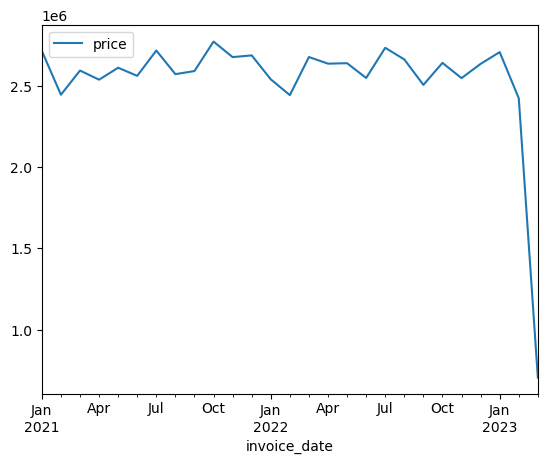

In [28]:
plot1.plot()

Insights:

For years 2021 and 2022, it can be seen that there is a consistent trend of increase and decrease (or rise and fall) in terms of sales, and it is also observable that all months have total sales which are higher than 2,400,000. For both years, it is also seen that February has the least amount of total sales. 

With 2023, although  sales in January and February have a similar trend to that of the two years prior, there is a drastic drop in March, and no additional data is recorded for the months following. With this, it can be said that the collection of data stopped in the month of March. And, because March 2023 sales are inconsistent with the rest, it is possible that the data used for March 2023 was acquired before full sales for the said month were available.

# Hard

In [29]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: 
# category, decade age range (e.g., 10-19, 20-29, and so forth).

cutoff = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 200]
age_range = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "99+"]

#.cut() 
new_df1["age_range"] = pd.cut(new_df1["age"], bins = cutoff, labels = age_range)

In [30]:
pivot_table = pd.pivot_table(new_df1, values="sales", index=['category', 'age_range'], aggfunc='sum')
pivot_table

#new_df1.groupby(["category","age_range"]).sum()["sales"] : also produces similar output w/out use of pivot table
#aggfunc common: mean, sum, count

sales
category age_range           
Books    10-19       12801.75
         20-29       79461.75
         30-39       84143.10
         40-49       87203.40
         50-59       74962.20
...                       ...
Toys     60-69      363955.20
         70-79      273244.16
         80-89      153932.80
         90-99           0.00
         99+             0.00

[80 rows x 1 columns]